Resultados esperados:
 - input: 
    - avg_runtime
    - input_complexity
 - output: 
    - p_cores


In [23]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
df_train = pd.read_csv("dataset/train_data.csv")
df_test = pd.read_csv("dataset/test_data.csv")

In [ ]:
x_train = df_train[['input', 'average_runtime']]
y_train = df_train['cores']

x_test = df_test[['input', 'average_runtime']]
y_test = df_test['cores']

#### LSTM Model

In [ ]:
learning_rate = 0.001

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(2, activation="relu", dropout=0.2, input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss="mse",
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=1, epochs=30, verbose=2)

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(np.arange(0, 100), history.history["loss"], label="train_loss",linestyle='--')
ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch #")
ax.legend()
plt.show()

#### MLP Regression Model

In [45]:
df_clean = pd.read_csv("dataset/clean_data.csv")
df_clean['cores'] = df_clean['cores']/df_clean['cores'].max()
df_clean['input'] = df_clean['input']/df_clean['input'].max()

df_clean

,cores,input,average_runtime
0,32,0,0.123057
1,32,1,0.249501
2,32,2,0.365511
3,32,3,0.497553
4,32,4,0.700741
...,...,...,...
315,1,5,7.320535
316,1,6,18.991211
317,1,7,75.998050
318,1,8,165.176281


In [46]:
X = df_clean[['input', 'average_runtime']].values
y = df_clean['cores'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [49]:
learning_rate = 0.0001
input_shape = (X_train.shape[1],)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape = input_shape))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=2, validation_data=(X_test, y_test))

Epoch 1/500
7/7 - 1s - loss: 412.6702 - val_loss: 385.7479 - 861ms/epoch - 123ms/step
Epoch 2/500
7/7 - 0s - loss: 398.6385 - val_loss: 374.8702 - 48ms/epoch - 7ms/step
Epoch 3/500
7/7 - 0s - loss: 387.0935 - val_loss: 364.9607 - 46ms/epoch - 7ms/step
Epoch 4/500
7/7 - 0s - loss: 378.1602 - val_loss: 355.8913 - 43ms/epoch - 6ms/step
Epoch 5/500
7/7 - 0s - loss: 370.1861 - val_loss: 348.1417 - 43ms/epoch - 6ms/step
Epoch 6/500
7/7 - 0s - loss: 364.7598 - val_loss: 341.2755 - 44ms/epoch - 6ms/step
Epoch 7/500
7/7 - 0s - loss: 359.4748 - val_loss: 336.0150 - 44ms/epoch - 6ms/step
Epoch 8/500
7/7 - 0s - loss: 355.6845 - val_loss: 331.3683 - 93ms/epoch - 13ms/step
Epoch 9/500
7/7 - 0s - loss: 352.3986 - val_loss: 327.6097 - 47ms/epoch - 7ms/step
Epoch 10/500
7/7 - 0s - loss: 349.8760 - val_loss: 324.1637 - 43ms/epoch - 6ms/step
Epoch 11/500
7/7 - 0s - loss: 347.3721 - val_loss: 321.4069 - 40ms/epoch - 6ms/step
Epoch 12/500
7/7 - 0s - loss: 345.0803 - val_loss: 318.8972 - 44ms/epoch - 6ms/st

In [50]:
loss = model.evaluate(X_test, y_test)
print(f'Erro no conjunto de teste: {loss}')

predictions = model.predict(X_test)

for i in range(10):
    print(f'Valor Real: {y_test[i]}, Previsão: {predictions[i][0]}')

3/3 [==============================] - 0s 3ms/step - loss: 66.4726
Erro no conjunto de teste: 66.47260284423828
3/3 [==============================] - 0s 2ms/step
Valor Real: 7, Previsão: 16.921913146972656
Valor Real: 16, Previsão: 17.379411697387695
Valor Real: 25, Previsão: 19.32094955444336
Valor Real: 32, Previsão: 18.27483367919922
Valor Real: 6, Previsão: 16.83615493774414
Valor Real: 17, Previsão: 19.153921127319336
Valor Real: 13, Previsão: 16.909442901611328
Valor Real: 4, Previsão: 13.679250717163086
Valor Real: 18, Previsão: 16.434341430664062
Valor Real: 10, Previsão: 19.1240177154541


#### MLP Classification Model

In [90]:
import keras
from keras import layers

data = pd.read_csv("dataset\clean_data.csv")

data['labels'] = data['cores'].max() - data['cores']
X = data[['input', 'average_runtime']].values
y = data['labels'].values
X = (X - X.mean(axis=0)) / X.std(axis=0)  # Normalização Z-score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = np.unique(y).size

a = y_train
y_train = to_categorical(y_train, num_classes, dtype='int8')
y_test = to_categorical(y_test, num_classes, dtype='int8')

model = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(num_classes, activation='softmax')
])

lr = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

predictions = model(X_test)

Epoch 1/300
7/7 [==============================] - 1s 41ms/step - loss: 3.4622 - accuracy: 0.0343 - val_loss: 3.4927 - val_accuracy: 0.0577
Epoch 2/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4656 - accuracy: 0.0343 - val_loss: 3.4939 - val_accuracy: 0.0385
Epoch 3/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4637 - accuracy: 0.0343 - val_loss: 3.4948 - val_accuracy: 0.0385
Epoch 4/300
7/7 [==============================] - 0s 8ms/step - loss: 3.4601 - accuracy: 0.0343 - val_loss: 3.4962 - val_accuracy: 0.0385
Epoch 5/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4598 - accuracy: 0.0392 - val_loss: 3.4973 - val_accuracy: 0.0385
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4613 - accuracy: 0.0196 - val_loss: 3.4980 - val_accuracy: 0.0385
Epoch 7/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4590 - accuracy: 0.0343 - val_loss: 3.4991 - val_accuracy: 0.0385
Epoch 8/300
7/7 [=========

Text(113.9222222222222, 0.5, 'predicted label')

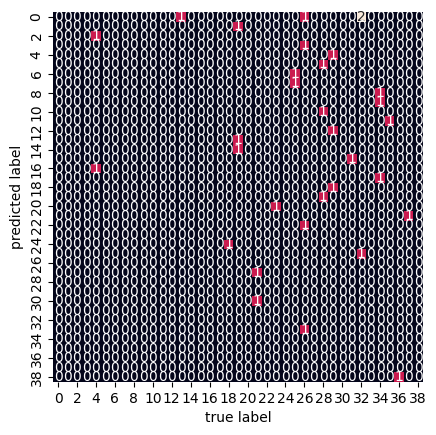

In [91]:
predictions=np.argmax(predictions, axis=0)
y_test=np.argmax(y_test, axis=0)

matrix=confusion_matrix(y_test, predictions)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')